<h1>Real Estate Valuation with Random Forest Regression Model</h1>


# Importing Libraries


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [0]:
dataset = pd.read_csv('real_estate_valuation_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [118]:
print(X)

[[ 32.       84.87882  10.       24.98298 121.54024]
 [ 19.5     306.5947    9.       24.98034 121.53951]
 [ 13.3     561.9845    5.       24.98746 121.54391]
 ...
 [ 18.8     390.9696    7.       24.97923 121.53986]
 [  8.1     104.8101    5.       24.96674 121.54067]
 [  6.5      90.45606   9.       24.97433 121.5431 ]]


In [119]:
print(y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

# Splitting the dataset into the training and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [121]:
print(X_train)

[[1.65000e+01 2.28801e+03 3.00000e+00 2.49589e+01 1.21514e+02]
 [4.50000e+00 2.27588e+03 3.00000e+00 2.49631e+01 1.21512e+02]
 [3.83000e+01 4.39711e+02 0.00000e+00 2.49716e+01 1.21534e+02]
 ...
 [1.36000e+01 4.19735e+03 0.00000e+00 2.49388e+01 1.21504e+02]
 [3.59000e+01 6.40739e+02 3.00000e+00 2.49756e+01 1.21537e+02]
 [6.60000e+00 9.04561e+01 9.00000e+00 2.49743e+01 1.21543e+02]]


In [122]:
print(X_test)

[[1.03000e+01 2.11447e+02 1.00000e+00 2.49742e+01 1.21530e+02]
 [2.40000e+01 4.52769e+03 0.00000e+00 2.49474e+01 1.21496e+02]
 [3.45000e+01 3.24942e+02 6.00000e+00 2.49781e+01 1.21542e+02]
 [2.56000e+01 4.51969e+03 0.00000e+00 2.49483e+01 1.21496e+02]
 [1.44000e+01 1.69980e+02 1.00000e+00 2.49737e+01 1.21530e+02]
 [3.66000e+01 4.88819e+02 8.00000e+00 2.49702e+01 1.21545e+02]
 [3.58000e+01 1.70731e+02 7.00000e+00 2.49672e+01 1.21543e+02]
 [3.48000e+01 4.05213e+02 1.00000e+00 2.49735e+01 1.21534e+02]
 [1.05000e+01 2.79173e+02 7.00000e+00 2.49753e+01 1.21545e+02]
 [1.72000e+01 3.90568e+02 5.00000e+00 2.49794e+01 1.21542e+02]
 [1.33000e+01 2.50631e+02 7.00000e+00 2.49661e+01 1.21543e+02]
 [1.33000e+01 3.36053e+02 5.00000e+00 2.49578e+01 1.21534e+02]
 [1.27000e+01 1.87482e+02 1.00000e+00 2.49739e+01 1.21530e+02]
 [3.40000e+01 1.57605e+02 7.00000e+00 2.49663e+01 1.21542e+02]
 [4.60000e+00 2.59661e+02 6.00000e+00 2.49759e+01 1.21545e+02]
 [3.59000e+01 6.16400e+02 3.00000e+00 2.49772e+01 1.215

In [123]:
print(y_train)

[ 23.2  29.3  38.4  37.5  34.3  44.8  54.4  37.9   7.6  29.5  25.3  13.7
  30.   30.8  40.6  20.7  40.8  55.3  40.5  40.8  40.3  33.1  26.2  41.9
  18.8  78.   15.6  39.4  41.   23.5  35.6  47.1  35.6  55.   41.5  37.4
  21.8  31.3  36.8  26.6  40.   50.   38.1  59.5  56.8  25.3  32.4  37.8
  49.8  52.7  21.8  28.8  29.3  37.4  37.4  44.   50.7  42.3  36.5  51.4
  32.9  38.6  21.4  50.4  37.4  52.2  58.8  43.8  22.1  53.3  17.4  45.7
  36.6  39.7  15.4  12.2  46.6  31.3  22.3  23.1  17.4  46.8  32.9  62.9
  25.5  42.2  42.5  39.5  49.3  31.3  11.6  55.1  19.   34.6  50.8  63.2
  43.4  35.1  27.3  41.2  37.2  23.1  14.7  34.1  37.5  42.   25.6  53.3
  41.4  20.   47.4  24.7  38.5  49.   57.1  55.9  36.9  25.6  20.7  37.
  29.5  33.6  47.3  23.9  18.3  35.7  67.7  40.6  43.5  31.1  51.8  61.9
  56.3  63.3  48.1  18.6  20.5  20.9  27.3  26.6  34.   52.2  56.8  38.8
  44.   39.7  53.9  30.6  42.3  41.   16.1  39.4  73.6  44.5  36.7  30.5
  15.9  42.3  34.1  26.5  24.4  31.7  40.8  23.8  28

In [124]:
print(y_test)

[45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1 42.  42.4 28.5 39.1
 53.7 36.8 40.6 55.2 39.3 44.3 53.5 25.3 22.8 51.7 45.5 34.4 31.6 25.9
 49.5 24.7 51.7 29.7 45.4 50.5 26.5 30.1 46.1 28.9 54.4 15.  44.9 29.8
 23.6 48.  16.7 40.9 40.2 12.9 21.3 62.1 63.9 40.3 42.2 19.1 28.4 28.5
 60.7 37.5 39.3 28.8 42.3 44.3 42.6 57.4 42.2 25.7 13.2 27.  56.2 38.3
 20.8 43.1 78.3 20.9 32.5 33.4 32.1 19.2 53.  38.2 46.7 24.6 36.2]


# Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the dataset with Random Forest on the training set

In [126]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 700, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting the test set

In [0]:
y_pred = regressor.predict(X_test)


In [128]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[45.3  65.54]
 [14.4  18.82]
 [46.   47.27]
 [15.6  20.05]
 [50.2  32.09]
 [38.1  40.08]
 [48.5  45.18]
 [41.4  36.81]
 [51.6  55.94]
 [40.1  42.09]
 [42.   43.63]
 [42.4  20.39]
 [28.5  34.61]
 [39.1  41.9 ]
 [53.7  59.93]
 [36.8  45.3 ]
 [40.6  37.16]
 [55.2  47.49]
 [39.3  40.8 ]
 [44.3  41.67]
 [53.5  51.88]
 [25.3  28.3 ]
 [22.8  33.81]
 [51.7  50.63]
 [45.5  55.21]
 [34.4  43.21]
 [31.6  43.52]
 [25.9  23.17]
 [49.5  51.49]
 [24.7  22.77]
 [51.7  43.38]
 [29.7  27.33]
 [45.4  51.48]
 [50.5  39.45]
 [26.5  43.46]
 [30.1  27.52]
 [46.1  47.57]
 [28.9  24.38]
 [54.4  52.04]
 [15.   15.15]
 [44.9  51.88]
 [29.8  37.13]
 [23.6  28.  ]
 [48.   47.05]
 [16.7  15.58]
 [40.9  42.07]
 [40.2  40.01]
 [12.9  14.38]
 [21.3  25.68]
 [62.1  53.77]
 [63.9  58.78]
 [40.3  37.58]
 [42.2  49.01]
 [19.1  18.49]
 [28.4  28.1 ]
 [28.5  36.51]
 [60.7  55.38]
 [37.5  37.49]
 [39.3  43.64]
 [28.8  27.37]
 [42.3  38.5 ]
 [44.3  59.  ]
 [42.6  39.74]
 [57.4  51.42]
 [42.2  41.25]
 [25.7  26.55]
 [13.2  20

## Evaluate the regression model

In [129]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
#the sample size
n = len(y)
#the number of independent variables
p = X.shape[1]

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
np.set_printoptions(precision = 5)
#print("n = {:}".format(n))
#print("p = {:}".format(p))
print("R-squared: {:.5f}".format(r2))
print("Adjusted R-squared: {:.5f}".format(1 - (1 - r2)* (n - 1)/(n - p - 1)))
print("MAE (Mean Absolute Error): {:.5f}".format(mae))
print("RMSE (Root Mean Squared Error): {:.5f}".format(rmse))



R-squared: 0.69012
Adjusted R-squared: 0.68632
MAE (Mean Absolute Error): 5.18718
RMSE (Root Mean Squared Error): 7.33660


## Applying PCA (Principal Component Analysis) for all variables

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5, random_state = 0)
pca.fit_transform(X_train)

array([[ 1.70838, -0.03541,  0.23771, -0.52705, -0.18961],
       [ 1.59925, -1.02157,  0.76543, -0.52337, -0.21738],
       [ 0.24542,  1.70018, -0.43046,  1.48841, -0.58455],
       ...,
       [ 4.07618, -0.45886, -0.39557, -0.62312,  0.18591],
       [-0.38311,  1.6071 , -0.12578,  0.74231, -0.11202],
       [-1.80123, -0.8283 ,  0.12753, -1.07735,  0.11884]])

## PCA Scree Plot

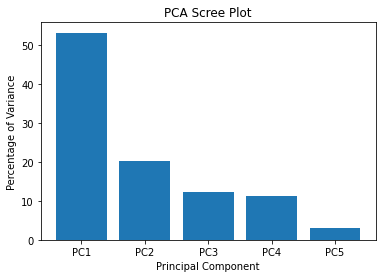

In [131]:
variance_percentage = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.bar(x = range(0, 5), height = variance_percentage, tick_label = columns)
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance')
plt.show()

In [132]:
print(pca.explained_variance_ratio_ * 100)

[53.20967 20.28096 12.21821 11.26392  3.02724]


## Applying PCA (Principal Component Analysis) for 2 variables

In [0]:
pca = PCA(n_components = 1, random_state = 0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the dataset with Random Forest on the training set

In [134]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 700, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Predicting the test set result

In [0]:
y_pred = regressor.predict(X_test)


In [136]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[45.3  40.53]
 [14.4  19.18]
 [46.   43.67]
 [15.6  19.52]
 [50.2  32.4 ]
 [38.1  42.8 ]
 [48.5  27.69]
 [41.4  33.61]
 [51.6  45.15]
 [40.1  38.18]
 [42.   41.17]
 [42.4  34.46]
 [28.5  32.4 ]
 [39.1  41.23]
 [53.7  56.7 ]
 [36.8  43.69]
 [40.6  37.63]
 [55.2  47.43]
 [39.3  40.88]
 [44.3  42.36]
 [53.5  51.87]
 [25.3  28.28]
 [22.8  45.37]
 [51.7  50.63]
 [45.5  51.17]
 [34.4  40.73]
 [31.6  44.05]
 [25.9  29.47]
 [49.5  51.17]
 [24.7  24.75]
 [51.7  47.28]
 [29.7  27.23]
 [45.4  46.92]
 [50.5  36.51]
 [26.5  44.68]
 [30.1  27.42]
 [46.1  45.34]
 [28.9  22.68]
 [54.4  52.26]
 [15.   12.45]
 [44.9  45.91]
 [29.8  33.85]
 [23.6  24.43]
 [48.   45.34]
 [16.7  14.84]
 [40.9  36.88]
 [40.2  54.56]
 [12.9  14.7 ]
 [21.3  25.18]
 [62.1  51.91]
 [63.9  60.53]
 [40.3  32.27]
 [42.2  50.32]
 [19.1  24.25]
 [28.4  28.09]
 [28.5  39.74]
 [60.7  56.52]
 [37.5  36.44]
 [39.3  41.17]
 [28.8  27.23]
 [42.3  47.93]
 [44.3  42.36]
 [42.6  47.43]
 [57.4  45.15]
 [42.2  49.33]
 [25.7  21.43]
 [13.2  20

# Evaluate the regression model

In [137]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
#the sample size
n = len(y)
#the number of independent variables
p = X.shape[1]

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
np.set_printoptions(precision = 5)
#print("n = {:}".format(n))
#print("p = {:}".format(p))
print("R-squared: {:.5f}".format(r2))
print("Adjusted R-squared: {:.5f}".format(1 - (1 - r2)* (n - 1)/(n - p - 1)))
print("MAE (Mean Absolute Error): {:.5f}".format(mae))
print("RMSE (Root Mean Squared Error): {:.5f}".format(rmse))



R-squared: 0.65401
Adjusted R-squared: 0.64977
MAE (Mean Absolute Error): 5.50266
RMSE (Root Mean Squared Error): 7.75232
